In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
pickle_path = r'C:\Users\jv97\Desktop\github\Neutrino-Machine-Learning\checkpoints\oscNext_angle_m9_2vr5'

df = pd.read_pickle(os.path.join(pickle_path,'test_predictions.pkl'))

In [3]:
df.head()

,event_no,azimuth,zenith,pid,azimuth_retro,zenith_retro,azimuth_sigma,zenith_sigma,azimuth_pred,zenith_pred,azimuth_pred_sigma,zenith_pred_sigma
0,3112.0,2.193358,2.169334,14.0,1.426413,2.162529,0.446090,0.238478,2.211308,1.732597,-1.292671,-2.266392
1,8086.0,1.254911,2.925419,14.0,2.639656,3.008163,2.140337,0.134599,3.349339,2.729870,-1.317948,-4.621393
2,17266.0,5.754909,1.374746,14.0,3.003944,1.131962,0.480126,0.173851,2.791810,1.295266,-0.000520,-2.859205
3,20603.0,3.963934,1.774199,14.0,5.248772,2.074494,0.509195,0.393423,-1.028962,2.244847,-0.968555,-2.776270
4,44948.0,1.708282,1.048520,14.0,1.863373,1.273248,0.173783,0.134680,3.052326,1.968615,-0.697382,-2.108546


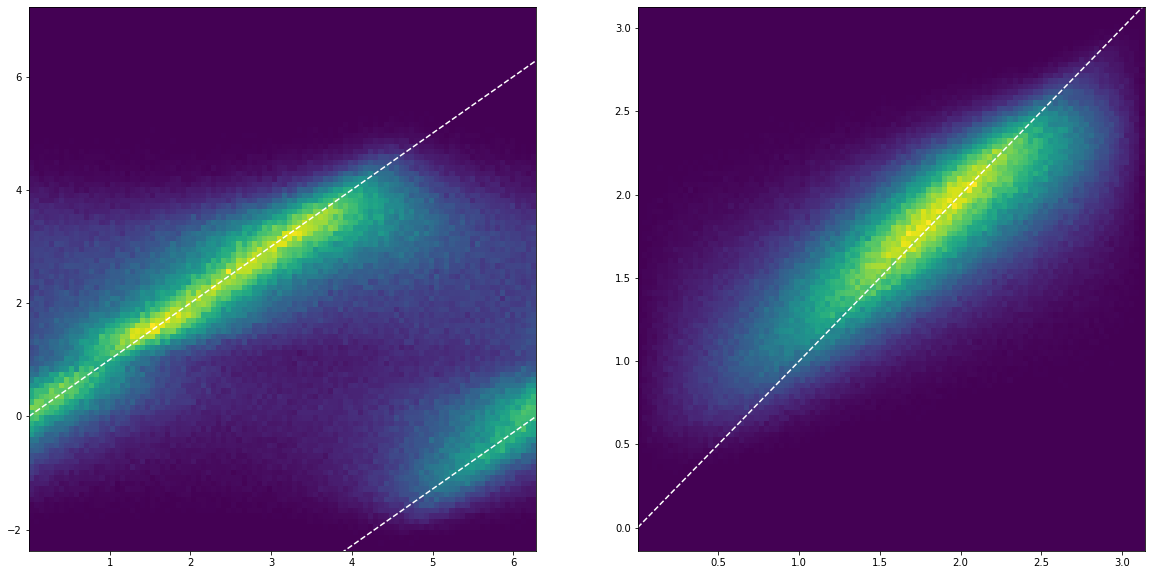

In [4]:
fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(df.azimuth,df.azimuth_pred,bins=100);
ax[1].hist2d(df.zenith,df.zenith_pred,bins=100);

ax[0].plot([0,2*np.pi],[0,2*np.pi],'w--')
ax[0].plot([0,2*np.pi],[-2*np.pi,0],'w--')
ax[1].plot([0,np.pi],[0,np.pi],'w--')

In [5]:
az_res = np.arccos(np.cos(df.azimuth_pred)*np.cos(df.azimuth) + np.sin(df.azimuth_pred)*np.sin(df.azimuth))*180/np.pi
ze_res = np.arccos(np.cos(df.zenith_pred)*np.cos(df.zenith) + np.sin(df.zenith_pred)*np.sin(df.zenith))*180/np.pi
#The above is perhaps not the right way for zenith but works as long as zenith pred is between 0 and pi

from scipy.special import iv
az_sigma = np.sqrt(1 - iv(1,np.square(df.azimuth_pred_sigma))/iv(0,np.square(df.azimuth_pred_sigma)))*180/np.pi
ze_sigma = np.sqrt(1 - iv(1,np.square(df.zenith_pred_sigma))/iv(0,np.square(df.zenith_pred_sigma)))*180/np.pi

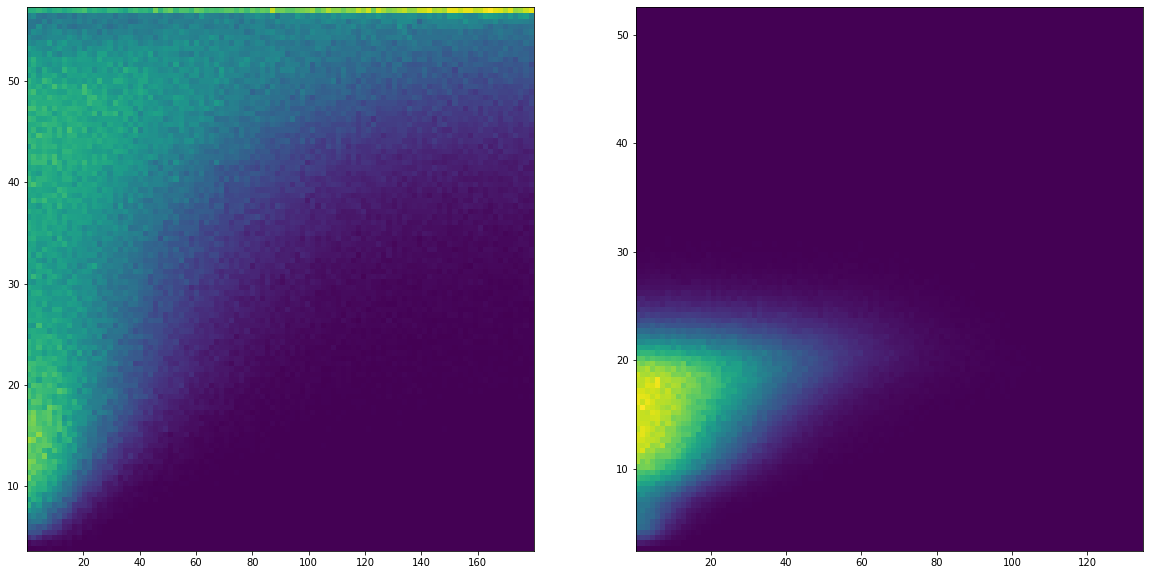

In [6]:
fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(az_res,az_sigma,bins=100);
ax[1].hist2d(ze_res,ze_sigma,bins=100);

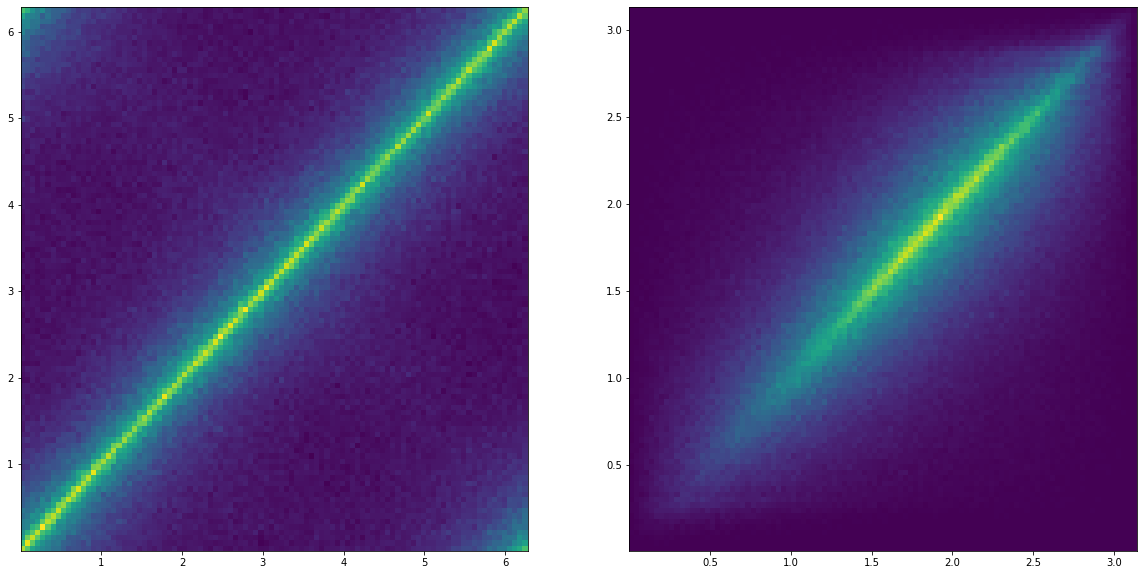

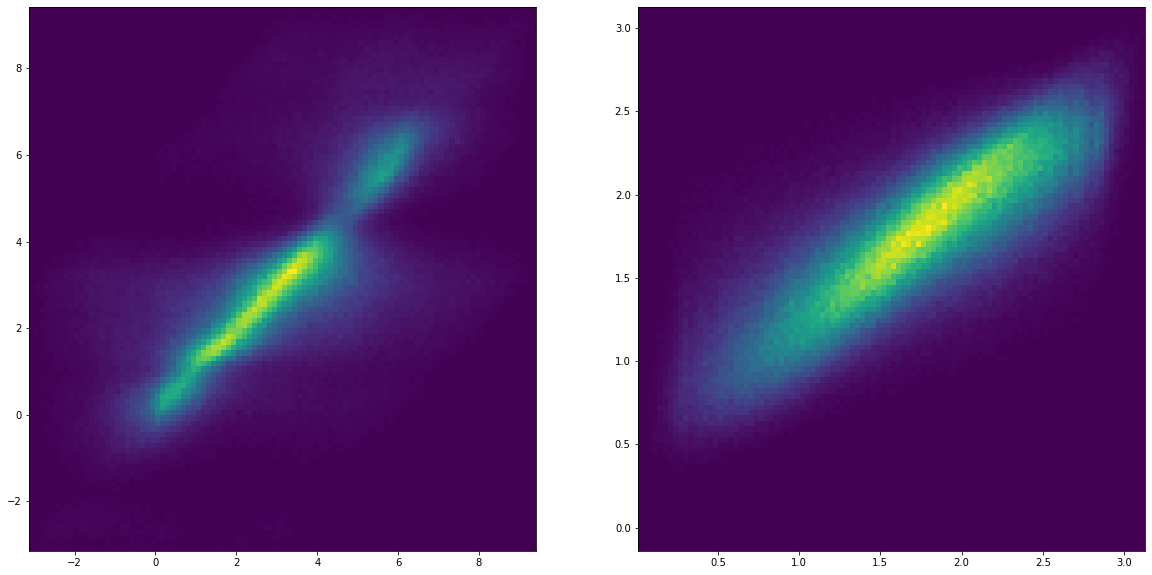

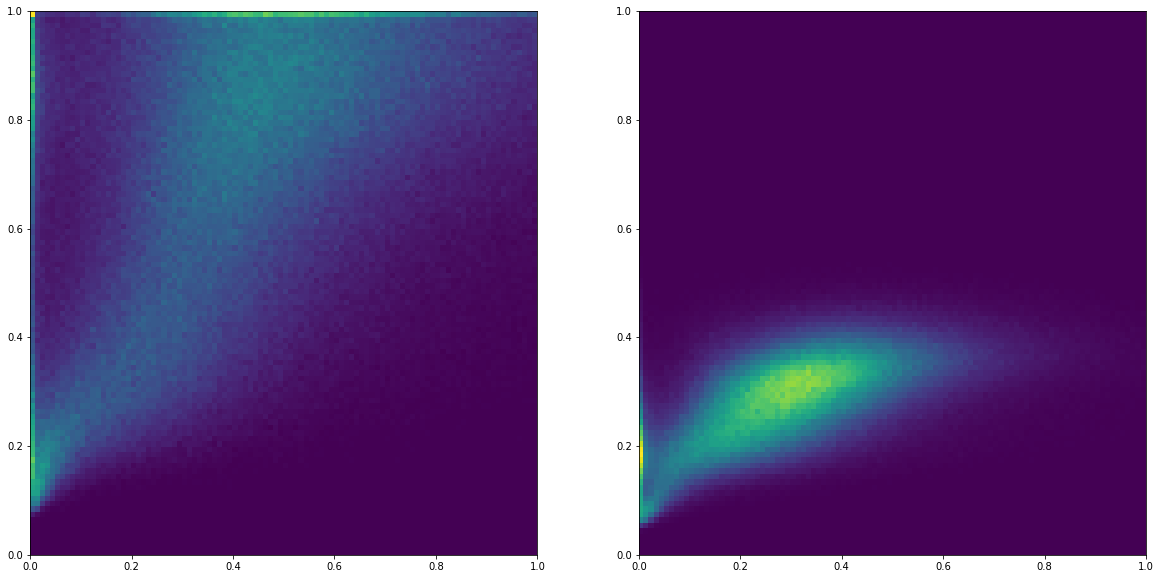

In [14]:
T_az_pred = df.azimuth_pred.copy()
T_az_pred[np.abs(T_az_pred - df.azimuth) > np.pi] = T_az_pred[np.abs(T_az_pred - df.azimuth) > np.pi] - np.sign(T_az_pred - df.azimuth)*2*np.pi

T_az_retro = df.azimuth_retro.copy()
T_az_retro[np.abs(T_az_retro - df.azimuth) > np.pi] = T_az_retro[np.abs(T_az_retro - df.azimuth) > np.pi] - np.sign(T_az_retro - df.azimuth)*2*np.pi

fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(df.azimuth,df.azimuth_retro,bins=100);
ax[1].hist2d(df.zenith,df.zenith_retro,bins=100);

fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(T_az_retro,T_az_pred,bins=100);
ax[1].hist2d(df.zenith_retro,df.zenith_pred,bins=100);

fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(df.azimuth_sigma,az_sigma*np.pi/180,bins=100,range=((0,1),(0,1)));
ax[1].hist2d(df.zenith_sigma,ze_sigma*np.pi/180,bins=100,range=((0,1),(0,1)));

In [8]:
df_data = pd.read_pickle(os.path.join(pickle_path,'test_data_predictions.pkl'))
df_data.head()

,event_no,azimuth_retro,zenith_retro,azimuth_sigma,zenith_sigma,azimuth_pred,zenith_pred,azimuth_pred_sigma,zenith_pred_sigma
0,0.0,1.947995,1.447643,0.011919,0.006036,2.097930,1.554986,-7.287058,-8.975826
1,1.0,1.429471,0.964943,0.313485,0.461077,1.212115,1.022235,-0.896617,-2.218345
2,2.0,2.910558,0.779122,0.786920,0.352431,3.311777,1.598022,-1.387376,-2.446280
3,3.0,4.711105,1.321742,0.463091,0.317207,4.021784,1.779897,-0.627772,-2.152980
4,4.0,2.461376,1.561457,0.473049,0.526679,1.738041,1.736209,-0.974840,-2.288333


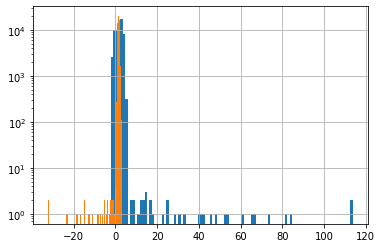

In [9]:
df_data.azimuth_pred.hist(bins=100);
plt.yscale('log')

df_data.zenith_pred.hist(bins=100);
plt.yscale('log')

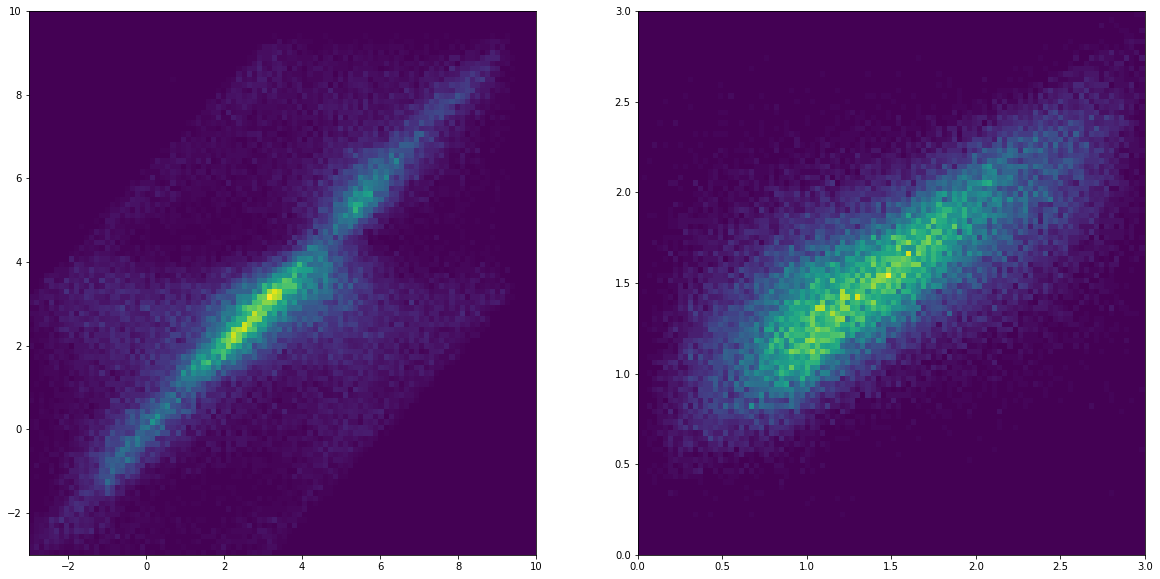

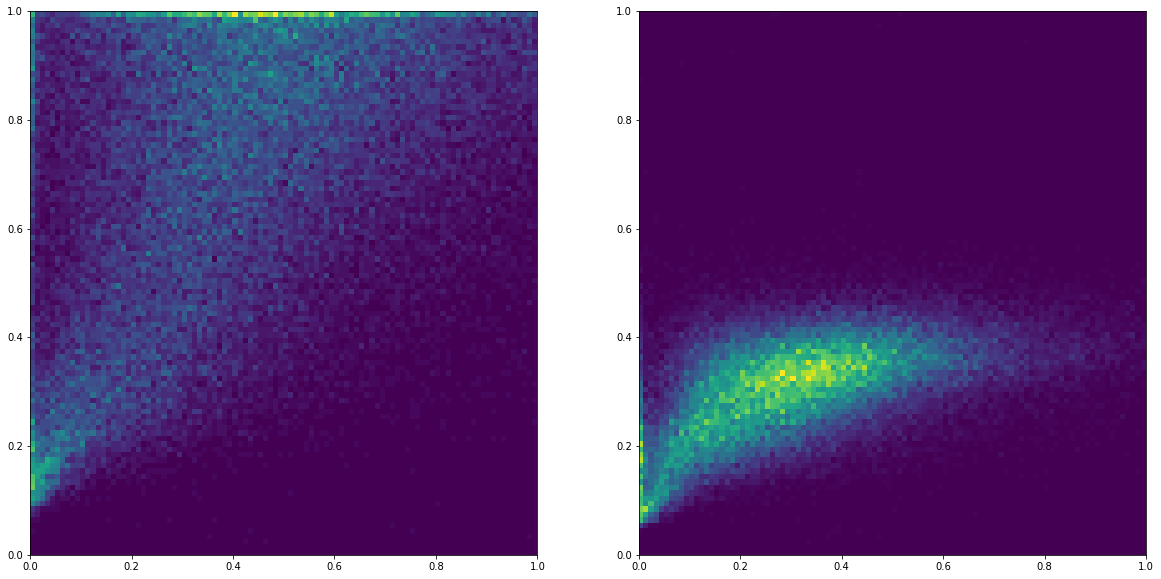

In [15]:
T_az_pred = df_data.azimuth_pred.copy()
T_az_pred[np.abs(T_az_pred - df.azimuth) > np.pi] = T_az_pred[np.abs(T_az_pred - df.azimuth) > np.pi] - np.sign(T_az_pred - df.azimuth)*2*np.pi

T_az_retro = df_data.azimuth_retro.copy()
T_az_retro[np.abs(T_az_retro - df.azimuth) > np.pi] = T_az_retro[np.abs(T_az_retro - df.azimuth) > np.pi] - np.sign(T_az_retro - df.azimuth)*2*np.pi

az_sigma = np.sqrt(1 - iv(1,np.square(df_data.azimuth_pred_sigma))/iv(0,np.square(df_data.azimuth_pred_sigma)))*180/np.pi
ze_sigma = np.sqrt(1 - iv(1,np.square(df_data.zenith_pred_sigma))/iv(0,np.square(df_data.zenith_pred_sigma)))*180/np.pi

fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(T_az_retro,T_az_pred,bins=100,range=((-3,10),(-3,10)));
ax[1].hist2d(df_data.zenith_retro,df_data.zenith_pred,bins=100,range=((0,3),(0,3)));

fig, ax = plt.subplots(figsize=(20,10),ncols=2)
ax[0].hist2d(df_data.azimuth_sigma,az_sigma*np.pi/180,bins=100,range=((0,1),(0,1)));
ax[1].hist2d(df_data.zenith_sigma,ze_sigma*np.pi/180,bins=100,range=((0,1),(0,1)));